<a href="https://colab.research.google.com/github/canamac/zeka-can/blob/main/MULT%C4%B0%20KERNEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing AKBNK.IS


[*********************100%%**********************]  1 of 1 completed


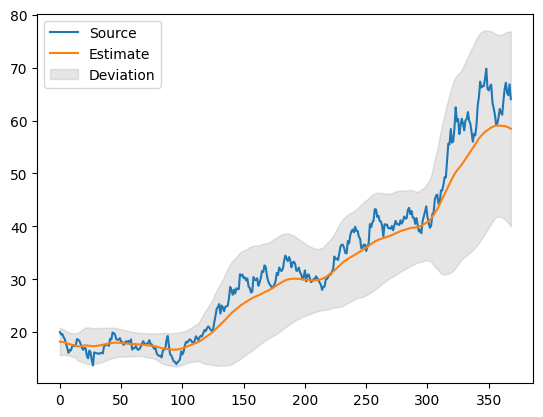

Analyzing ARCLK.IS


[*********************100%%**********************]  1 of 1 completed


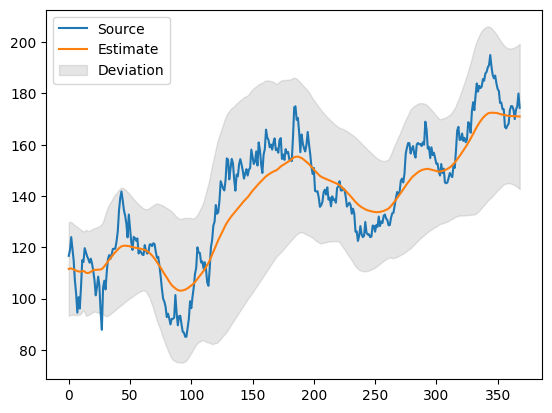

Analyzing ASELS.IS


[*********************100%%**********************]  1 of 1 completed


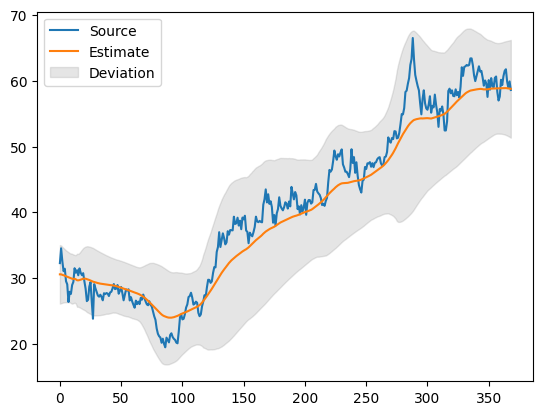

Analyzing BIMAS.IS


[*********************100%%**********************]  1 of 1 completed


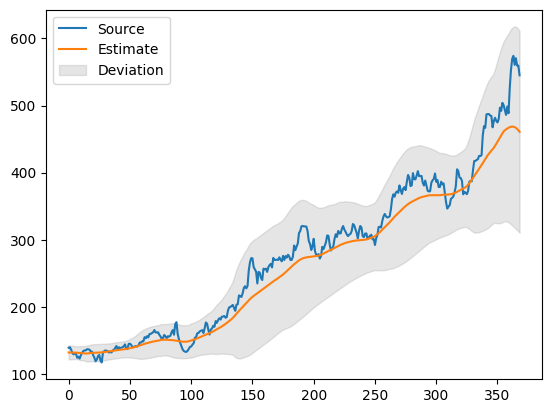

Analyzing EKGYO.IS


[*********************100%%**********************]  1 of 1 completed


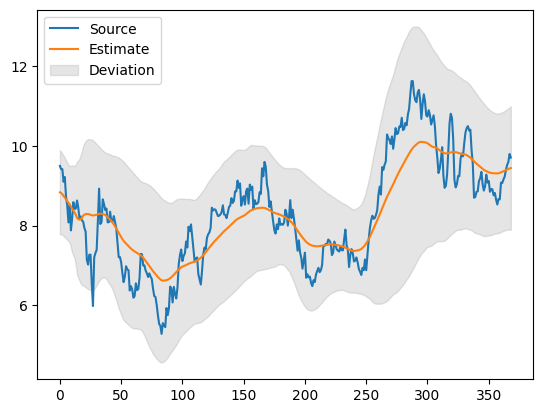

Analyzing GARAN.IS


[*********************100%%**********************]  1 of 1 completed


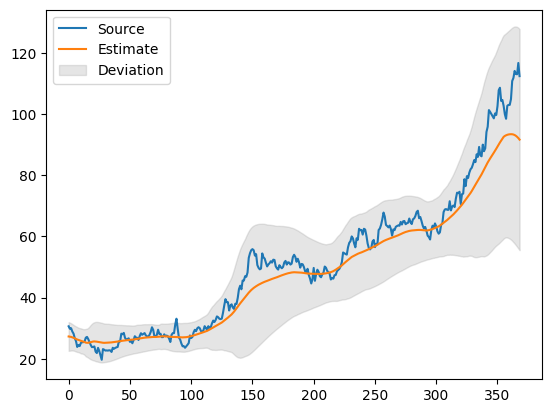

Analyzing HALKB.IS


[*********************100%%**********************]  1 of 1 completed


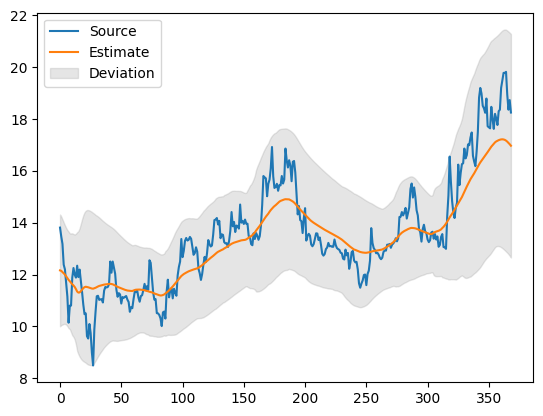

Analyzing ISCTR.IS


[*********************100%%**********************]  1 of 1 completed


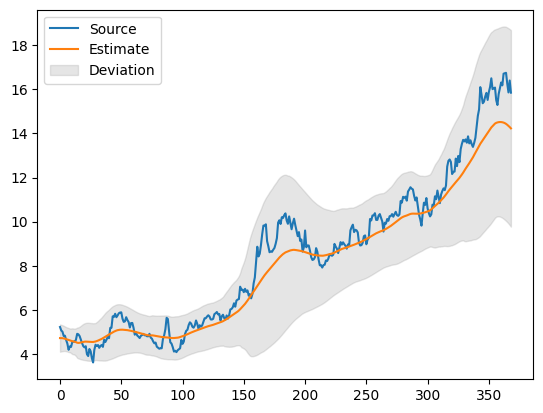

Analyzing KCHOL.IS


[*********************100%%**********************]  1 of 1 completed


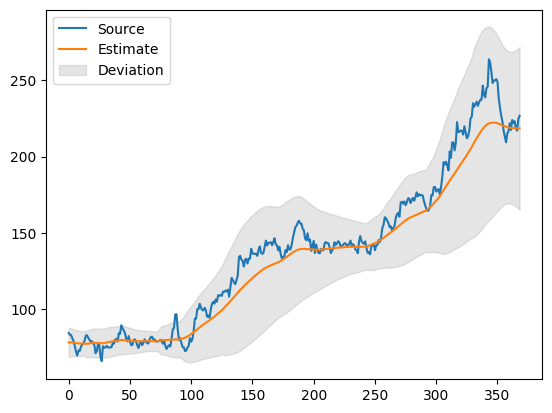

Analyzing KLGYO.IS


[*********************100%%**********************]  1 of 1 completed


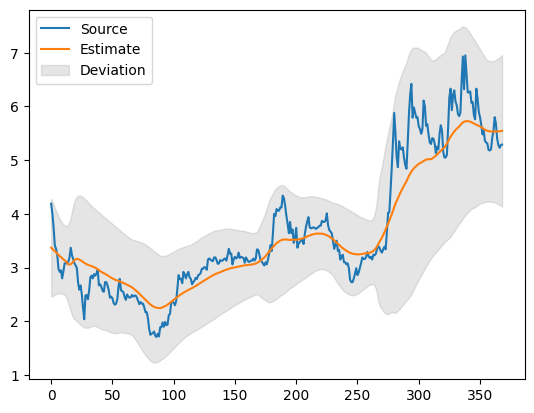

Analyzing KOZAL.IS


[*********************100%%**********************]  1 of 1 completed


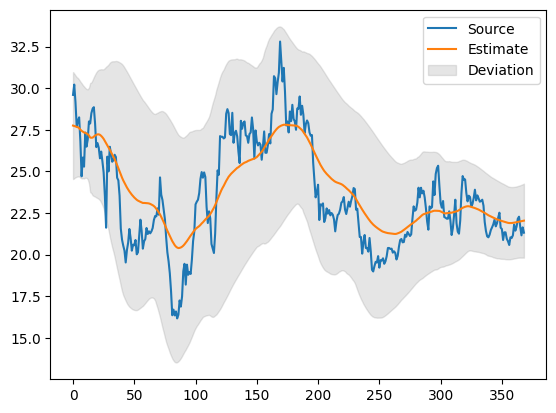

Analyzing PETKM.IS


[*********************100%%**********************]  1 of 1 completed


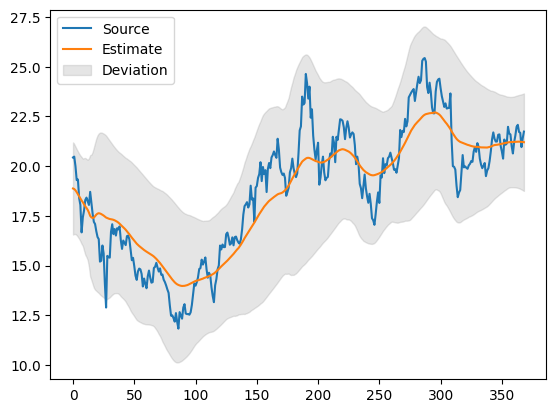

Analyzing SABAH.IS


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SABAH.IS']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


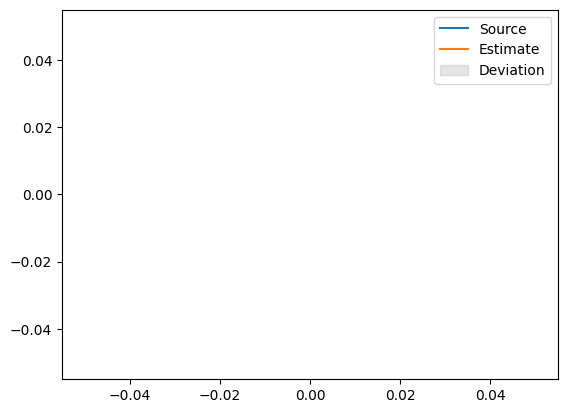

Analyzing SISE.IS


[*********************100%%**********************]  1 of 1 completed


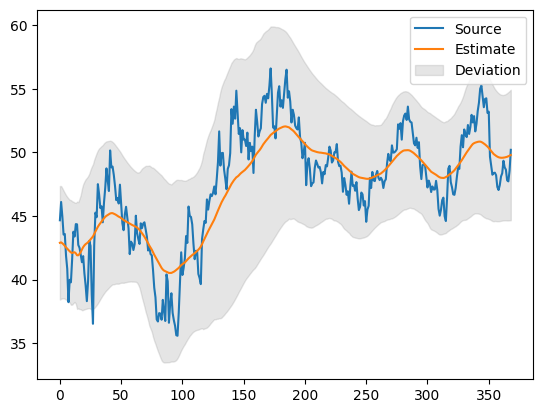

Analyzing TAVHL.IS


[*********************100%%**********************]  1 of 1 completed


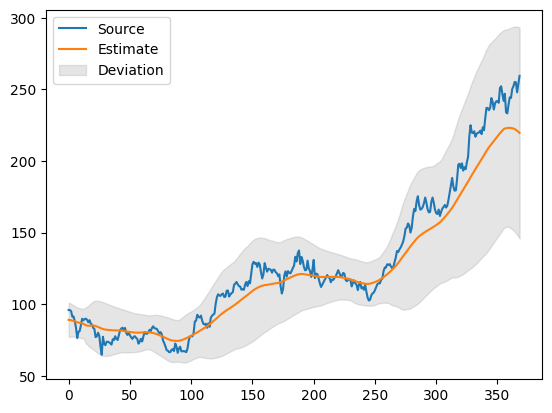

Analyzing THYAO.IS


[*********************100%%**********************]  1 of 1 completed


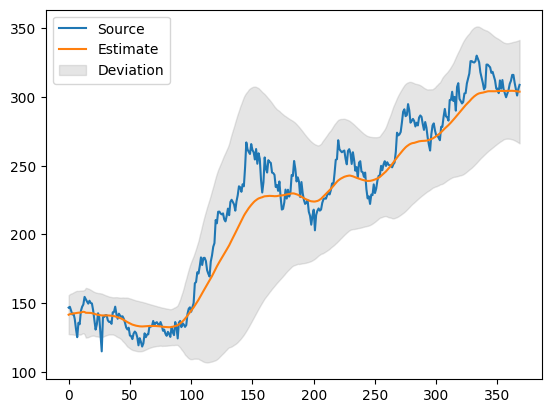

Analyzing TUPRS.IS


[*********************100%%**********************]  1 of 1 completed


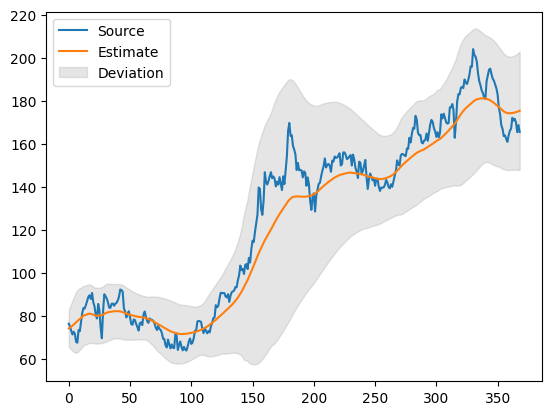

Analyzing VESTL.IS


[*********************100%%**********************]  1 of 1 completed


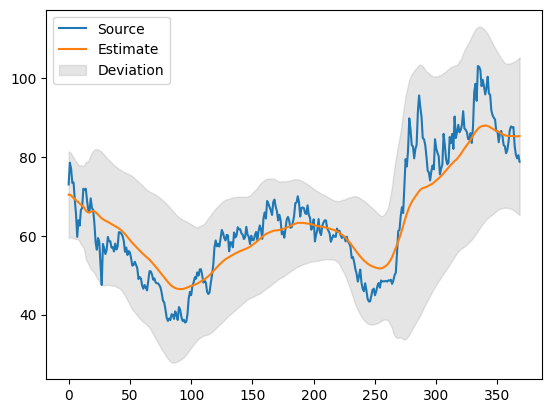

Analyzing YKBNK.IS


[*********************100%%**********************]  1 of 1 completed


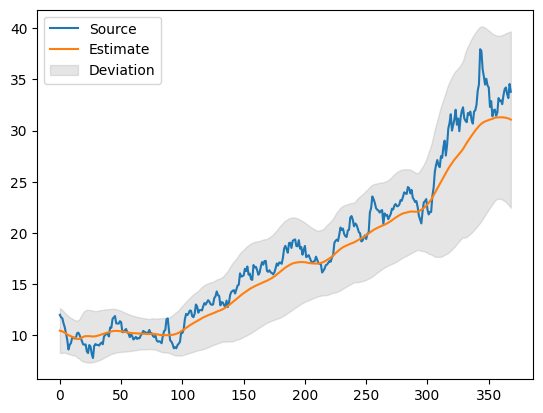

Analyzing ZOREN.IS


[*********************100%%**********************]  1 of 1 completed


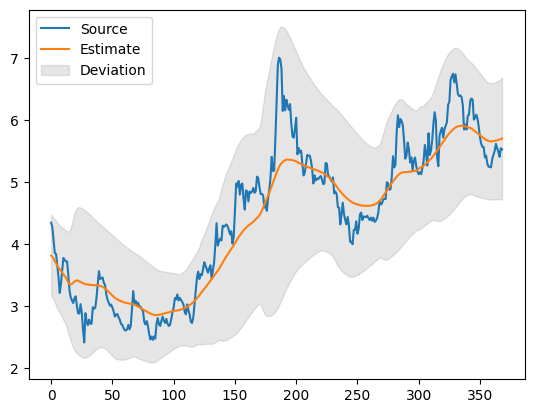

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

class MultiKernelRegression:
    def __init__(self, kernel='Laplace', bandwidth=14, deviations=2.0):
        self.kernel = kernel
        self.bandwidth = bandwidth
        self.deviations = deviations

    def gaussian(self, source):
        return np.exp(-np.square(source / self.bandwidth) / 2) / np.sqrt(2 * np.pi)

    def triangular(self, source):
        return np.where(np.abs(source / self.bandwidth) <= 1, 1 - np.abs(source / self.bandwidth), 0.0)

    def epanechnikov(self, source):
        return np.where(np.abs(source / self.bandwidth) <= 1, (3 / 4) * (1 - np.square(source / self.bandwidth)), 0.0)

    def quartic(self, source):
        return np.where(np.abs(source / self.bandwidth) <= 1, 15 / 16 * np.power(1 - np.square(source / self.bandwidth), 2), 0.0)

    def logistic(self, source):
        return 1 / (np.exp(source / self.bandwidth) + 2 + np.exp(-source / self.bandwidth))

    def cosine(self, source):
        return np.where(np.abs(source / self.bandwidth) <= 1, (np.pi / 4) * np.cos((np.pi / 2) * (source / self.bandwidth)), 0.0)

    def laplace(self, source):
        return (1 / (2 * self.bandwidth)) * np.exp(-np.abs(source / self.bandwidth))

    def exponential(self, source):
        return (1 / self.bandwidth) * np.exp(-np.abs(source / self.bandwidth))

    def kernel_function(self, source):
        if self.kernel == "Gaussian":
            return self.gaussian(source)
        elif self.kernel == "Triangular":
            return self.triangular(source)
        elif self.kernel == "Epanechnikov":
            return self.epanechnikov(source)
        elif self.kernel == "Quartic":
            return self.quartic(source)
        elif self.kernel == "Logistic":
            return self.logistic(source)
        elif self.kernel == "Cosine":
            return self.cosine(source)
        elif self.kernel == "Laplace":
            return self.laplace(source)
        elif self.kernel == "Exponential":
            return self.exponential(source)
        else:
            raise ValueError(f"Unknown kernel: {self.kernel}")

    def fit(self, data):
        self.data = data
        self.n = len(data)
        self.weights = np.zeros(self.n)
        self.estimate = np.zeros(self.n)
        self.std_dev = np.zeros(self.n)

        for i in range(self.n):
            for j in range(max(0, i - self.bandwidth), min(self.n, i + self.bandwidth)):
                diff = i - j
                self.weights[j] = self.kernel_function(diff)

            self.weights /= np.sum(self.weights)
            self.estimate[i] = np.sum(self.data * self.weights)
            self.std_dev[i] = np.sqrt(np.sum(self.weights * np.square(self.data - self.estimate[i])))

    def plot(self):
        upper_bound = self.estimate + self.deviations * self.std_dev
        lower_bound = self.estimate - self.deviations * self.std_dev

        plt.plot(self.data, label='Source')
        plt.plot(self.estimate, label='Estimate')
        plt.fill_between(range(self.n), lower_bound, upper_bound, color='gray', alpha=0.2, label='Deviation')
        plt.legend()
        plt.show()

def get_stock_symbols():
    # Türkiye borsa verilerini almak için kullanılan semboller (örnekler verilmiştir)
    return [
        'AKBNK.IS', 'ARCLK.IS', 'ASELS.IS', 'BIMAS.IS', 'EKGYO.IS', 'GARAN.IS', 'HALKB.IS',
        'ISCTR.IS', 'KCHOL.IS', 'KLGYO.IS', 'KOZAL.IS', 'PETKM.IS', 'SABAH.IS', 'SISE.IS',
        'TAVHL.IS', 'THYAO.IS', 'TUPRS.IS', 'VESTL.IS', 'YKBNK.IS', 'ZOREN.IS'
    ]

def fetch_stock_data(symbol, start_date, end_date):
    try:
        data = yf.download(symbol, start=start_date, end=end_date)
        return data['Close'].values
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return None

def analyze_stocks(stocks, start_date, end_date):
    for stock in stocks:
        print(f"Analyzing {stock}")
        data = fetch_stock_data(stock, start_date, end_date)
        if data is not None:
            mkr = MultiKernelRegression(kernel='Laplace', bandwidth=14, deviations=2.0)
            mkr.fit(pd.Series(data))
            mkr.plot()

# Kullanıcıdan tarih aralığını alın
start_date = '2023-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# BIST 100 hisselerini analiz et
stocks = get_stock_symbols()
analyze_stocks(stocks, start_date, end_date)
